# Exploratory Data Analysis 
<strong>Dataset</strong> https://archive.ics.uci.edu/ml/datasets/diabetes

<h2>Import Libraries</h2>

In [4]:
import numpy
import missingno as msno
import seaborn as sn

from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import Index
from pandas import concat
from pandas.plotting import scatter_matrix
from pandas import set_option

from typing import Tuple
from typing import List
from typing import Dict
from typing import Set

from numpy import ndarray

<h2>Define all functions</h2>

In [44]:
def get_custom_columns() -> List[str]:
    return ["pregnant", "glucose", "pressure", "triceps", "insulin", "mass", "pedigree", "age", "diabetes"]

def get_peek(df, n) -> DataFrame:
	return df.head(n)

def get_tail(df, n) -> DataFrame:
	return df.tail(n)

def get_missing_value(df) -> DataFrame:
	mask = df.isnull()
	total = mask.sum()
	percent = 100 * mask.mean()
	missing_value = concat([total, percent], axis=1, join="outer", keys=["count_missing", "percentage_missing"])
	missing_value.sort_values(by="percentage_missing", ascending=False, inplace=True)
	return missing_value

def get_missing_value_percentage(df):
	return round(100 * (df.isnull().sum() / len(df)), 2)

def get_unique_values_per_column(df, name) -> ndarray:
	return df[name].unique()

def get_unique_values(df) -> Series:
	return df.nunique()

def get_skew(df) -> DataFrame:
	return df.skew()

def get_correlation(df) -> DataFrame:
	return df.corr()

def get_kurtosis(df) -> DataFrame:
    return df.kurtosis()

def get_descriptive_statistics(df) -> DataFrame:
	return df.describe()

def get_class_distribution(df, name) -> DataFrame:
	return df.groupby(name).size()

def get_dimension(df) -> Tuple:
	return df.shape

def get_data_information(df):
	return df.info()

def get_data_types(df) -> Series:
	return df.dtypes

def get_columns(df) -> Index:
	return df.columns

def get_duplicates_row(df, name, all_rows=True):
	if all_rows:
		return df[df.duplicated()]
	else:
		return df[df.duplicated(name)]

def find_duplicates(df) -> bool:
	return df.duplicated().any()

def drop_duplicates(df):
	return df.drop_duplicates()

def show_missing_values(df) -> Series:
	return df.isnull().sum()

def check_missing_values(df) -> bool:
	return df.isnull().values.any()

def clean_data(df, default=True) -> DataFrame:
	if default:
		return impute_missing_value(df)

def impute_missing_value(df) -> DataFrame:
	return df.fillna(0)

def read_missing_values(df) -> None:
    for i in range(df.shape[1]):
        n_miss = df[[i]].isnull().sum()
        perc = n_miss / df.shape[0] * 100
        print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

def show_density_plots(df) -> None:
	df.plot(kind="density", subplots=True, layout=(3, 3), sharex=False)
	show_plot()

def show_histogram(df) -> None:
	df.hist()
	show_plot()

def show_scatter_plot(df) -> None:
	scatter_matrix(df)
	show_plot()

def show_whisker_plots_for_evaluation(results, names, title) -> None:
	fig = pyplot.figure()
	fig.suptitle(title)
	ax = fig.add_subplot(111)
	pyplot.boxplot(results)
	ax.set_xticklabels(names)
	show_plot()

def show_whisker_plots(df) -> None:
	df.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False)
	show_plot()

def show_correlation_plot(correlations, names):
	fig = pyplot.figure()
	ax = fig.add_subplot(111)
	cax = ax.matshow(correlations, vmin=-1, vmax=1)
	fig.colorbar(cax)
	ticks = numpy.arange(0, 9, 1)
	ax.set_xticks(ticks)
	ax.set_yticks(ticks)
	ax.set_xticklabels(names) 
	ax.set_yticklabels(names)
	show_plot()
    
def missing_plot(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.matrix(df[nullable_columns].sample(500))
	show_plot()

def missing_heat_map(df):
	mask = df.isnull()
	nullable_columns = df.columns[mask.any()].tolist()
	msno.heatmap(df[nullable_columns], figsize=(18, 18))
	show_plot()
def show_pair_plot(df):
	sn.pairplot(df,hue='Outcome')
def show_plot() -> None:
	pyplot.show()

<h2><strong>Data Profiling </strong></h2>

In [6]:
PATH: str = "./dataset.csv"
columns: List[str] = get_custom_columns()
df: DataFrame = read_csv(PATH, header=None, na_values='?')


In [7]:
df_head: DataFrame = get_peek(df, 10)
df_head

,0,1,2,3,4,5,6,7,8
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,NaN,NaN,0.0,0.232,54,1


In [8]:
read_missing_values(df)

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 18 (2.3%)
> 3, Missing: 135 (17.6%)
> 4, Missing: 241 (31.4%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)


<p> There are <strong>NaN</strong> values from this dataset. </p>

<p> Now, let's see how many <strong>instances</strong> </p>

In [9]:
df_dimension: Tuple = get_dimension(df)


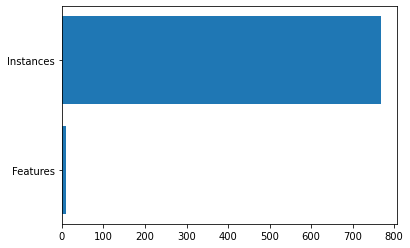

In [10]:
pyplot.barh(["Features", "Instances"], [df_dimension[1], df_dimension[0]])
show_plot()

<p>In this case we have <strong>768 instances and 9 features</strong><p>

<p>Let's check and verify each attributes data types. So that we would know if needed to parse the attributes to integer or float <p>
 

In [11]:
df_data_types: Series = get_data_types(df)
df_data_types

0      int64
1      int64
2    float64
3    float64
4    float64
5    float64
6    float64
7      int64
8      int64
dtype: object

<p> Running the code generates a summary for each attributes with data types. So far data type transformation is not necessary. We have here <strong> 5 floating value and 4 integers. </strong></p>

In [12]:
df_info = get_data_information(df)
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       750 non-null    float64
 3   3       633 non-null    float64
 4   4       527 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


<p>Dataset information generates a summary for each attributes <strong>constraint</strong> and the size is not huge.</p>

<p>Now, let's compute <strong>descriptive statistics</strong> </p>

In [13]:
df_descriptive_statistics: DataFrame = get_descriptive_statistics(df)
set_option("display.width", 100)
set_option("precision", 3)
df_descriptive_statistics

,0,1,2,3,4,5,6,7,8
count,768.000,768.000,750.000,633.000,527.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,70.764,24.916,116.292,31.993,0.472,33.241,0.349
std,3.370,31.973,16.313,14.125,122.941,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,17.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,27.000,92.000,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,35.000,166.500,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


<p>Interesting, the summary is not sufficient to understand the distribution. I think we need to apply <strong>imputation.</strong></p>
<h1>Imputation</h1>

In [14]:
df_missing_value: DataFrame = get_missing_value(df)
df_missing_value

,count_missing,percentage_missing
4,241,31.380
3,135,17.578
2,18,2.344
0,0,0.000
1,0,0.000
5,0,0.000
6,0,0.000
7,0,0.000
8,0,0.000


I will be performing a simple imputation method. All number that is missing will be set to <strong>0.<strong>

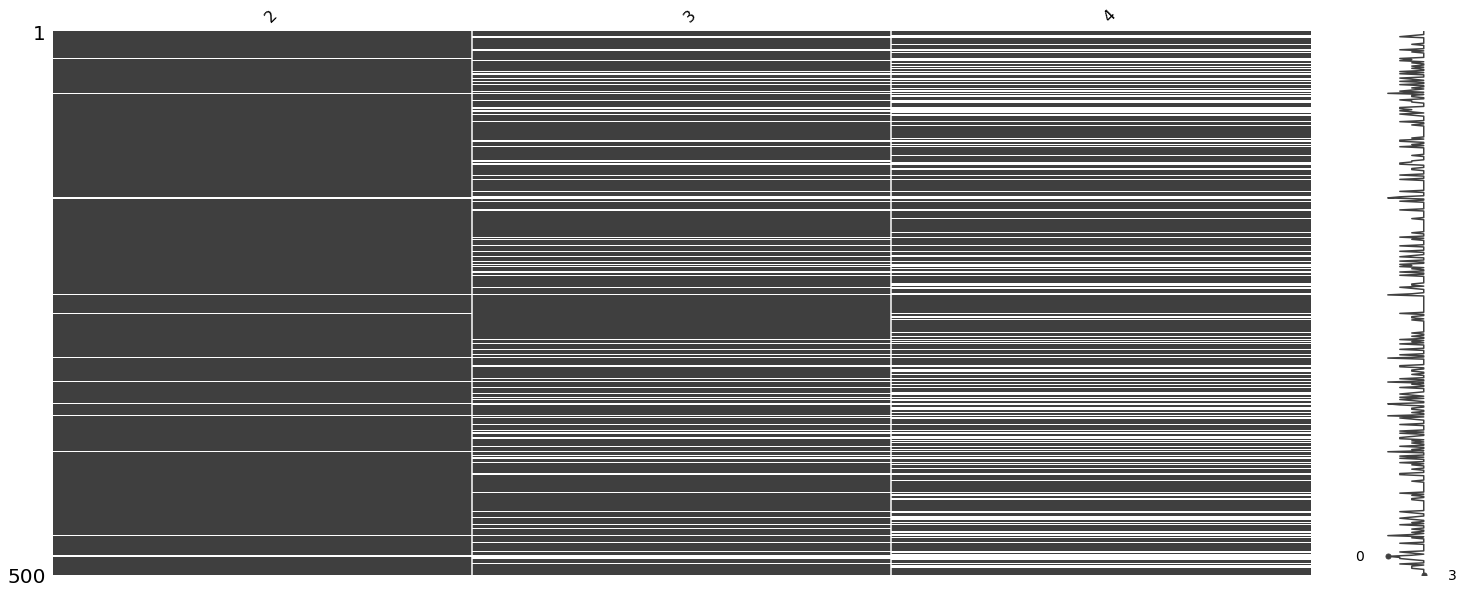

In [15]:
missing_plot(df)

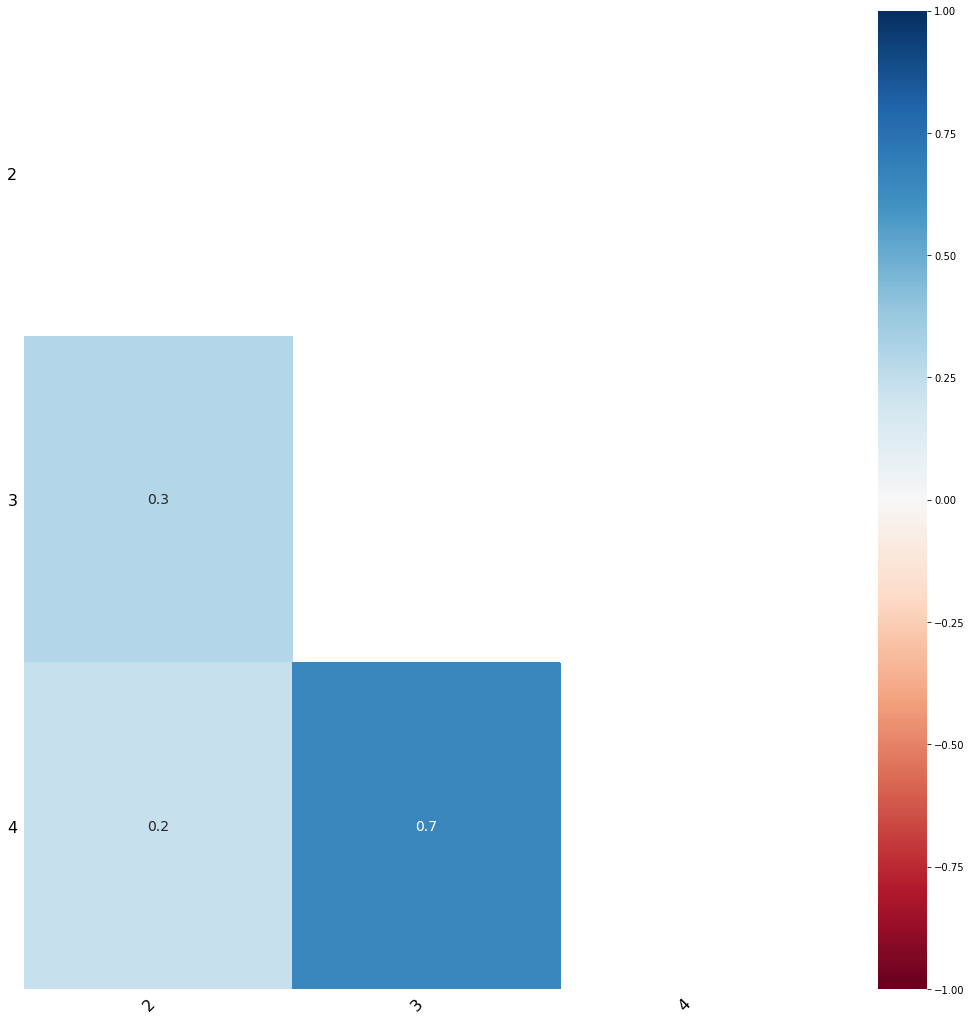

In [16]:
missing_heat_map(df)

In [17]:
df: DataFrame = impute_missing_value(df)

In [18]:
columns: List[str] = get_custom_columns()
columns

['pregnant',
 'glucose',
 'pressure',
 'triceps',
 'insulin',
 'mass',
 'pedigree',
 'age',
 'diabetes']

In [19]:
df.columns = columns
df_head: DataFrame = get_peek(df, 10)
df_head

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116,74.0,0.0,0.0,25.6,0.201,30,0
6,3,78,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115,0.0,0.0,0.0,35.3,0.134,29,0
8,2,197,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125,96.0,0.0,0.0,0.0,0.232,54,1


In [20]:
df_descriptive_statistics: DataFrame = get_descriptive_statistics(df)
set_option("display.width", 100)
set_option("precision", 3)
df_descriptive_statistics

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


<p>After we impute missing values, we have significant numbers between attributes.</p>

<h1>Visualization</h1>

<h2><strong>Univariate Plots</strong></h2>

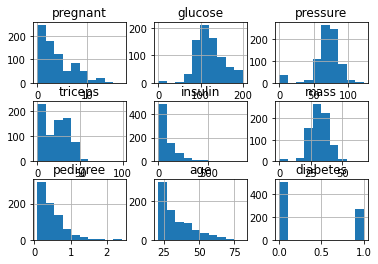

In [37]:
show_histogram(df)

<p>Interesting distributions, <strong>pregnant, pedigree, age, insulin, triceps</strong> are <strong>exponential distribution.</strong> Then <strong>glucose, pressure, diabetes</strong> are somewhat <strong>Gaussian distribution.</strong> We will see in <strong>density plots</strong> to determine each distribution using <strong>curve</strong></p>

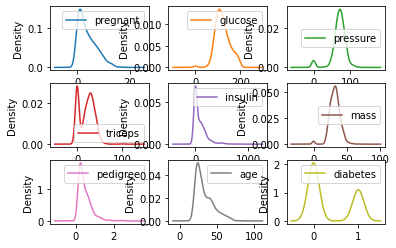

In [41]:
show_density_plots(df)

<p>Now that we have seen the distribution is not <strong>Gaussian</strong>. Instead <strong>Gamma</strong> distribution. </p>
<p>Let's check if there are any <strong>outliers</strong> on each attributes.</p>

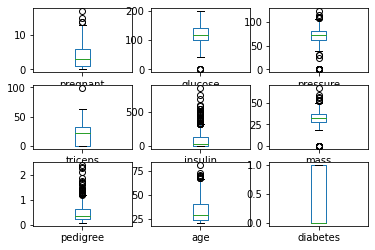

In [42]:
show_whisker_plots(df)

<p>There are outliers from <strong>pedigree, insulin, mass, pregnant, and pressure</strong></p>

<h2><strong>Multivariate Plots</strong></h2>

In [27]:
df_correlation: DataFrame = get_correlation(df)
df_correlation

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
pregnant,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
pressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
triceps,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
mass,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedigree,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
diabetes,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


<p><strong>Correlation</strong> check. How do we know if they are correlated? Base on the values if <strong> 1 it means positive correlation, 0 means no correlation, -1 negtative correlation.</strong>In this case no correlation at all. </p> 

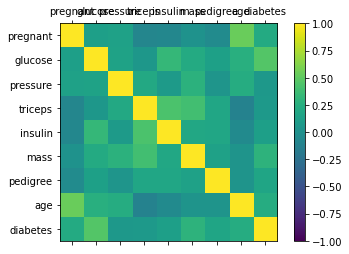

In [28]:
show_correlation_plot(df_correlation, columns)

In [31]:
df_skew: DataFrame = get_skew(df)
df_skew

pregnant    0.902
glucose     0.174
pressure   -1.844
triceps     0.109
insulin     2.272
mass       -0.429
pedigree    1.920
age         1.130
diabetes    0.635
dtype: float64

<p>Skew results </p>

In [30]:
df_kurtosis: DataFrame = get_kurtosis(df)
df_kurtosis

pregnant    0.159
glucose     0.641
pressure    5.180
triceps    -0.520
insulin     7.214
mass        3.290
pedigree    5.595
age         0.643
diabetes   -1.601
dtype: float64

<p>Let's see if how attributes pair change to one another</p>

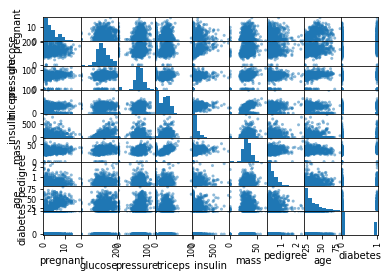

In [32]:
show_scatter_plot(df)

<h2><strong>Target Variables </strong></h2>
<p>Let's see and verify what <strong>type</strong> of <strong>classification</strong> problem is this.</p>



In [45]:
df_class_distribution: DataFrame = get_class_distribution(df, "diabetes")
df_class_distribution

diabetes
0    500
1    268
dtype: int64

<p>In our case this is <strong> binary classification</strong> problem because there are only <strong> two possobile outcomes 0 means negative in diabetes whilst 1 means positive in diabetes.</strong></p>

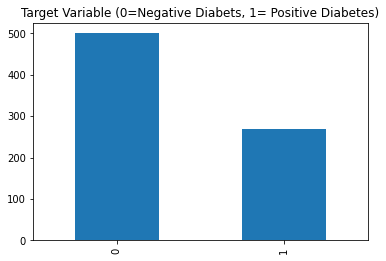

In [47]:
df["diabetes"].value_counts().plot(kind="bar")
pyplot.title("Target Variable (0=Negative Diabets, 1= Positive Diabetes)")
show_plot()

<p>This is worth investigating how categorical values being distributed. In our case <strong>positive diabetes are just 290</strong> while <strong>negative diabetes 490</strong></p>

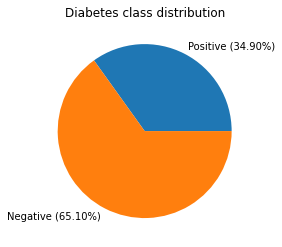

In [49]:
positive = df_class_distribution.iloc[1]
negative = df_class_distribution.iloc[0]
total = positive + negative
pyplot.title("Diabetes class distribution")
pyplot.pie([positive, negative], labels=[f"Positive ({positive/total * 100:.2f}%)", f"Negative ({negative/total * 100:.2f}%)"])
show_plot()

<p>About <strong>70%</strong> of our dataset are being classified as <strong>negative in diabetes</strong> then remaining <strong>30%</strong> are <strong>positive in diabetes.</strong></p>